## 대략적인 EDA

### 기본적인 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

### 데이터 뽑기

In [2]:
# pd.options.display.max_columns = None
df = pd.read_csv('02_1년연속성부실징후기업.csv',encoding='cp949')
df.drop(columns=['통계청 한국표준산업분류 10차(소분류)'],axis=1,inplace=True)
# df = df['이자보상배율'].replace(11111111.11,)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,순이익증가율,...,자본집약도,노동소득분배율,설비투자효율,총자본투자효율,기계투자효율,부가가치율,종업원수증가율,R & D 투자효율,무형자산처리무형자산개발비(천원),경상개발비(천원)
0,(주)CMG제약,58820,11-Dec,3.53,1.98,-5.91,17.64,-1.43,-2.02,NaN,...,202260.73,0.00,35.86,0.13,0.88,0.20,4.65,0.13,0.0,23703.0
1,(주)CMG제약,58820,12-Dec,-7.75,109.15,-4.12,207.08,7.73,75.17,NaN,...,426179.37,0.02,2.89,0.00,0.06,0.02,-0.74,0.74,0.0,120052.0
2,(주)CMG제약,58820,13-Dec,0.70,-2.09,16.09,-18.89,56.29,55.10,NaN,...,411121.79,0.00,77.91,0.13,1.52,0.34,1.49,0.66,5993000.0,134454.0
3,(주)CMG제약,58820,14-Dec,3.60,3.86,74.30,-25.93,6.37,0.01,-46.64,...,354075.16,0.00,37.80,0.12,0.89,0.31,20.59,0.51,3511000.0,116533.0
4,(주)CMG제약,58820,15-Dec,-32.22,-2.64,-5.37,-7.17,11.04,-4.48,-2409.61,...,362389.88,0.00,24.21,0.08,0.52,0.16,-4.88,3.08,3464000.0,831910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,흥아해운(주),3280,14-Dec,1.12,13.69,45.19,-13.68,-8.50,7.76,1.06,...,859920.53,0.00,27.88,0.14,7792.66,0.11,9.90,0.00,NaN,0.0
9449,흥아해운(주),3280,15-Dec,1.02,21.93,49.36,-11.18,-12.92,3.39,-42.68,...,973727.92,0.00,21.49,0.13,8970.81,0.12,7.68,0.00,NaN,0.0
9450,흥아해운(주),3280,16-Dec,0.21,21.08,38.84,-25.08,56.39,11.22,-263.29,...,1017550.17,0.00,15.81,0.11,9100.38,0.13,15.87,0.00,NaN,0.0
9451,흥아해운(주),3280,17-Dec,-0.42,-11.43,-16.50,13.29,11.18,-39.28,NaN,...,921779.07,0.00,8.35,0.05,3982.05,0.06,-2.23,0.00,NaN,0.0


In [5]:
df[df['총자산증가율']==-100]

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,순이익증가율,...,자본집약도,노동소득분배율,설비투자효율,총자본투자효율,기계투자효율,부가가치율,종업원수증가율,R & D 투자효율,무형자산처리무형자산개발비(천원),경상개발비(천원)
54,(주)SNT에너지,100840,11-Dec,-9.21,-100.0,-100.0,-100.0,-100.0,-100.0,17.11,...,1502781.74,0.0,-4.14,-0.02,-0.33,-0.03,2.22,0.45,0.0,871757.0
81,(주)강스템바이오텍,217730,15-Dec,-5.41,-100.0,-100.0,-100.0,-100.0,-100.0,-47.35,...,402945.58,0.0,-96.67,-0.12,NaN,-1.94,0.00,255.88,0.0,3798708.0
86,(주)강원에너지,114190,11-Nov,393.90,-100.0,-100.0,-100.0,-100.0,-100.0,-96.68,...,571479.44,0.0,328.31,0.24,4.84,0.26,14.63,2.76,0.0,1388076.0
122,(주)고려시멘트,198440,14-Dec,11111111.11,-100.0,-100.0,-100.0,-100.0,-100.0,-32.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,(주)골드퍼시픽,38530,11-Dec,14.16,-100.0,-100.0,-100.0,-100.0,-100.0,NaN,...,465652.88,0.0,44.04,0.16,0.51,0.39,210.53,0.99,328368.0,111530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,현우산업(주),92300,11-Dec,2.86,-100.0,-100.0,-100.0,-100.0,-100.0,14.44,...,352335.33,0.0,32.34,0.20,0.41,0.22,14.63,0.00,0.0,0.0
9401,화성산업(주),2460,15-Dec,81.69,-100.0,-100.0,-100.0,-100.0,-100.0,-53.02,...,1368431.71,0.0,133.20,0.15,12.66,0.15,-25.91,0.00,0.0,0.0
9415,휴림네트웍스(주),192410,14-Dec,11111111.11,-100.0,-100.0,-100.0,-100.0,-100.0,-87.35,...,391332.35,0.0,504.70,0.40,3.00,0.29,0.00,0.00,0.0,0.0
9430,휴마시스(주),205470,14-Dec,-0.76,-100.0,-100.0,-100.0,-100.0,-100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# pd.options.display.max_rows = 50

In [4]:
# df = df.replace('#NAME?',None)

In [137]:
df.isna().sum()

회사명                     0
거래소코드                   0
회계년도                    0
이자보상배율                  0
총자산증가율                136
유형자산증가율               138
유동자산증가율               136
재고자산증가율               613
자기자본증가율               136
순이익증가율               2609
매출액총이익율               144
매출액순이익율               144
자기자본순이익율              144
총자본정상영업이익율            144
매출액정상영업이익율            144
총자본순이익율               144
총자본회전율                448
재고자산회전율               826
매출채권회전율               510
유형자산회전율               448
매입채무회전율               738
자기자본회전율               448
타인자본회전율               448
유동자산회전율              2675
유동비율                  144
당좌비율                  144
현금비율                  144
부채비율                  144
차입금의존도                144
CASH_FLOW_대_부채비율      144
CASH_FLOW_대_매출액비율     144
CASH_FLOW_대_차입금비율     144
자기자본구성비율              144
차입금비율                 144
당좌자산구성비율              144
유동자산구성비율              144
매출채권_대_매입채무비율         144
단기차입금_대_총차입금비율        144
유동부채비율      

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 9429
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                4600 non-null   object 
 1   거래소코드              4600 non-null   int64  
 2   회계년도               4600 non-null   object 
 3   이자보상배율             4600 non-null   float64
 4   총자산증가율             4600 non-null   float64
 5   유형자산증가율            4600 non-null   float64
 6   유동자산증가율            4600 non-null   float64
 7   재고자산증가율            4600 non-null   float64
 8   자기자본증가율            4600 non-null   float64
 9   순이익증가율             4600 non-null   float64
 10  매출액총이익율            4600 non-null   float64
 11  매출액순이익율            4600 non-null   float64
 12  자기자본순이익율           4600 non-null   float64
 13  총자본정상영업이익율         4600 non-null   float64
 14  매출액정상영업이익율         4600 non-null   float64
 15  총자본순이익율            4600 non-null   float64
 16  총자본회전율             4600 

In [101]:
# df = df.fillna(2)
df['순이익증가율'] = df['순이익증가율'].fillna(0)
df = df.dropna()

In [102]:
# df.iloc[:,3:] = np.std(df.iloc[:,3:])

In [103]:
# df

In [104]:
np.std(df['이자보상배율'])

1397883.110722579

### 이상치 확인하기

#### 일단 그냥 한번 확인하기

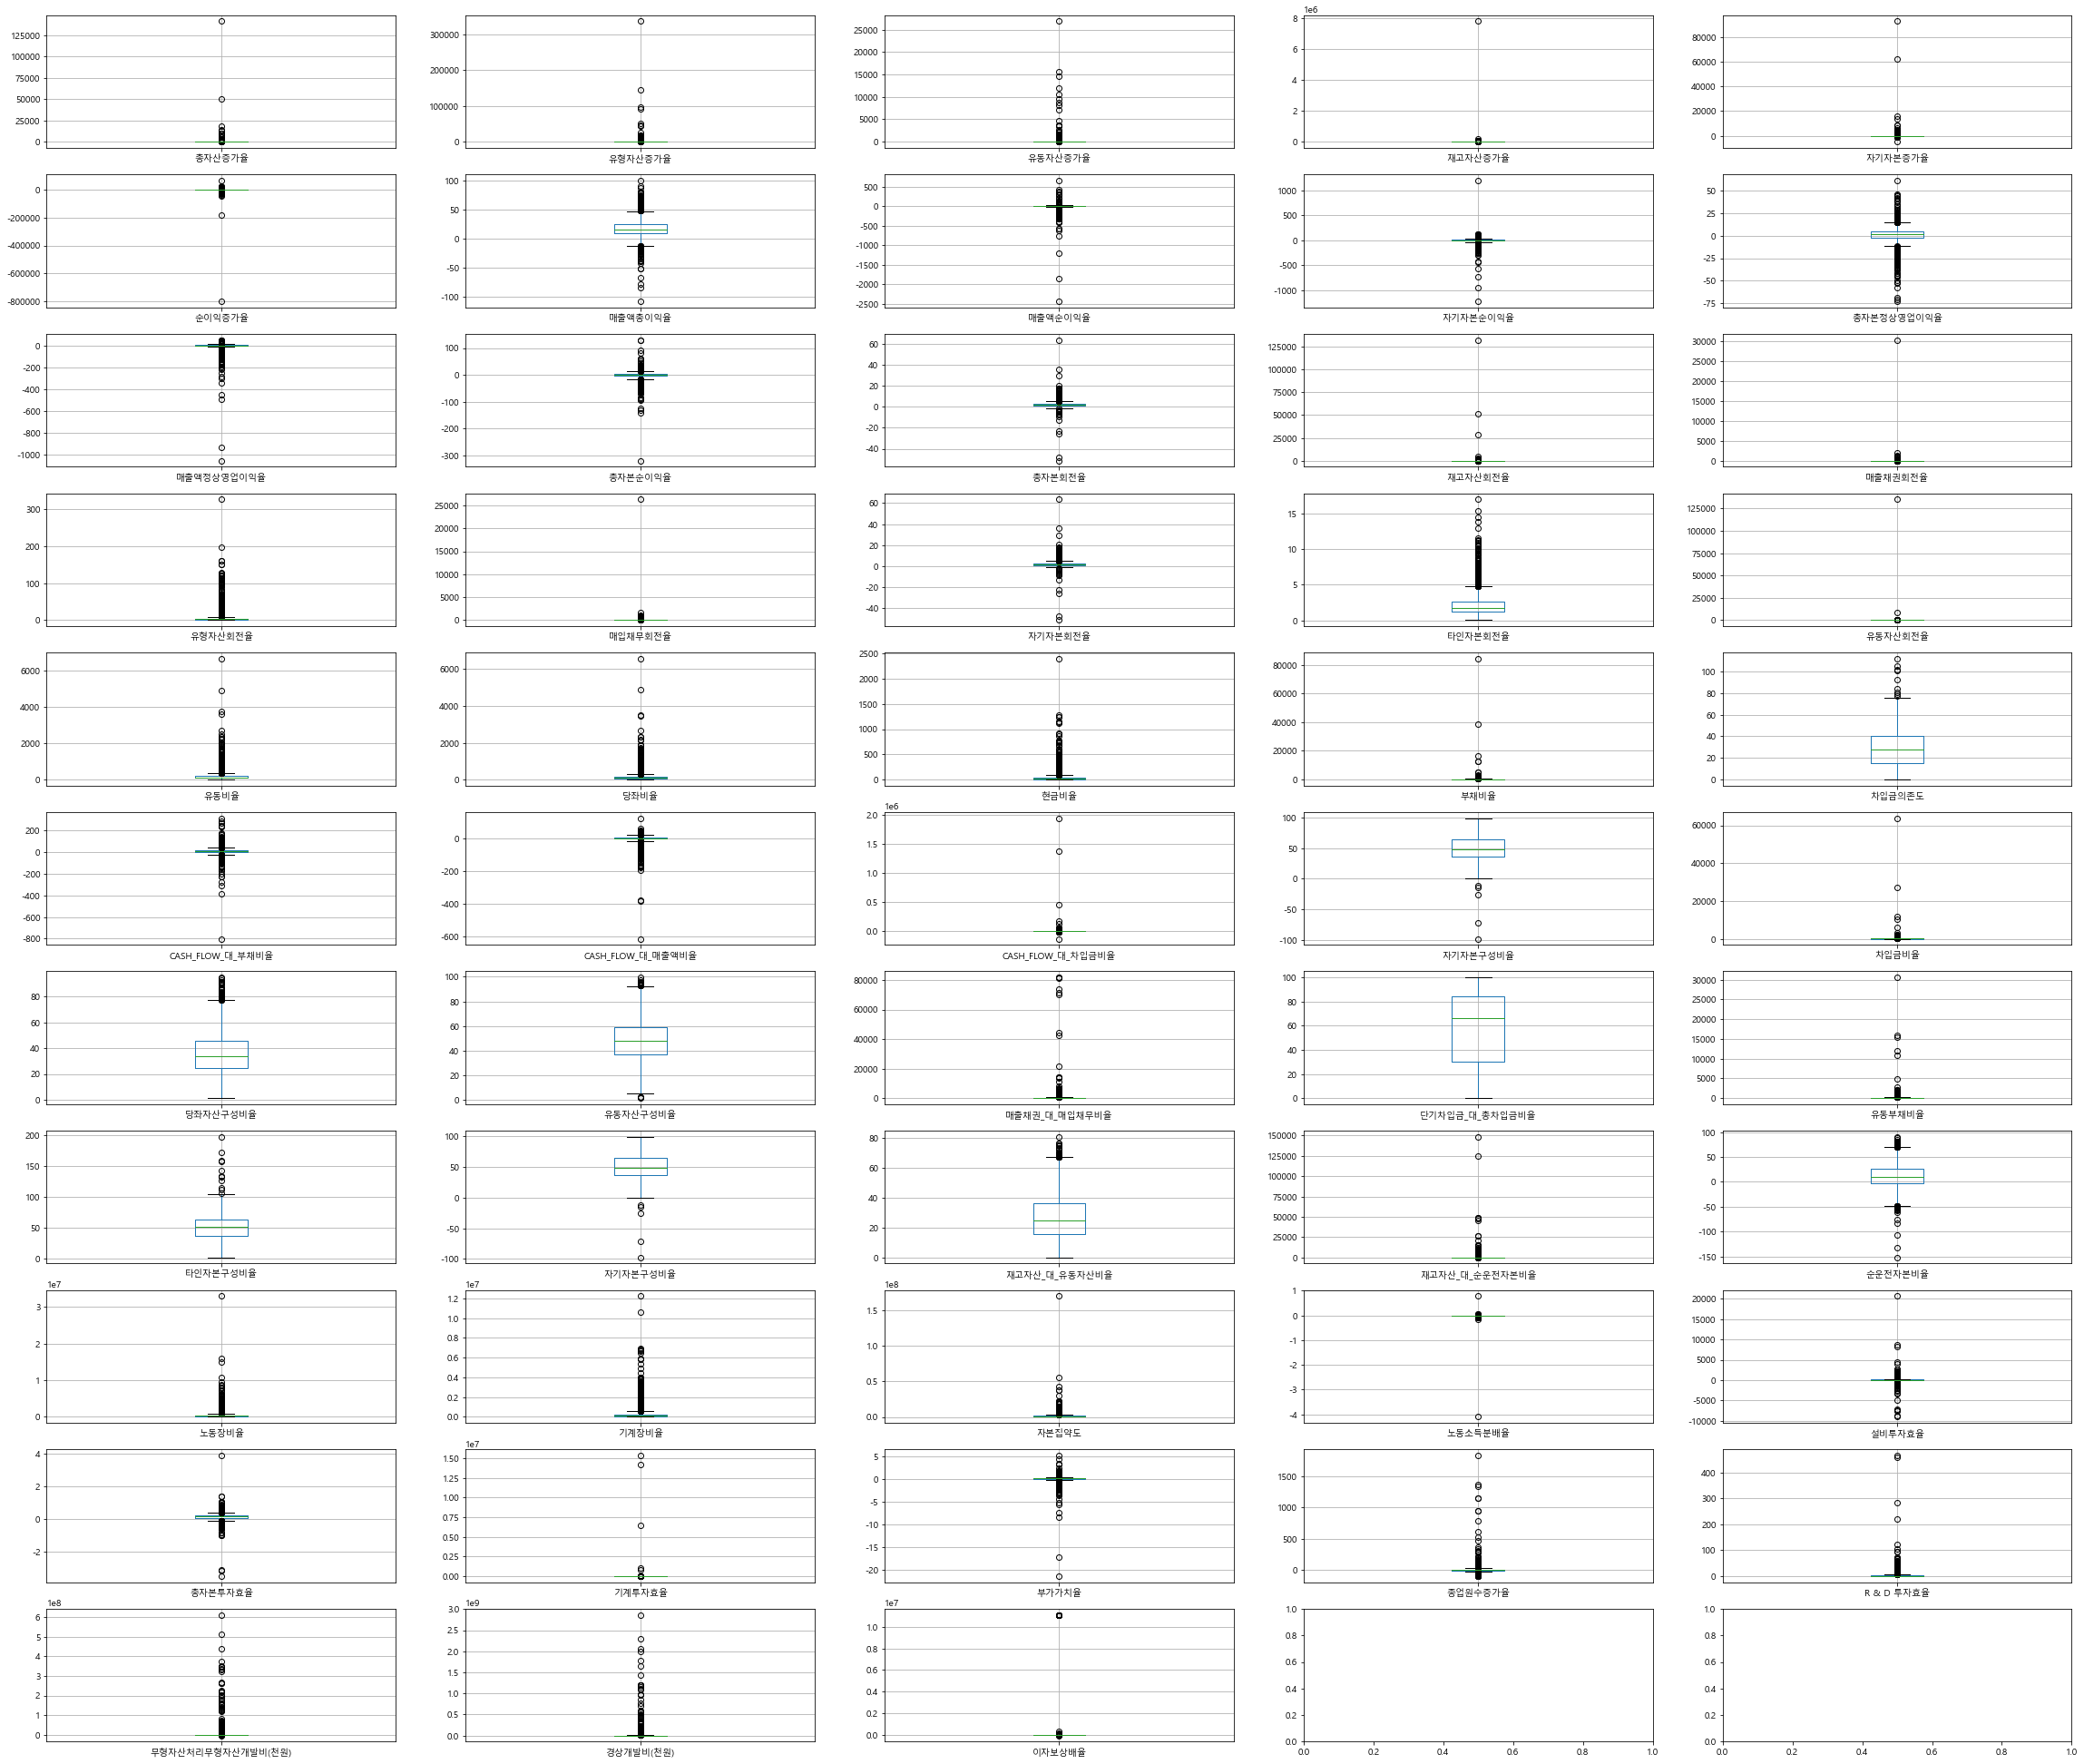

In [105]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(11, 5)
fig.set_size_inches((40,35))

df.boxplot(column='총자산증가율', ax=axes[0,0])
df.boxplot(column='유형자산증가율', ax=axes[0,1])
df.boxplot(column='유동자산증가율', ax=axes[0,2])
df.boxplot(column='재고자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='순이익증가율', ax=axes[1,0])
df.boxplot(column='매출액총이익율', ax=axes[1,1])
df.boxplot(column='매출액순이익율', ax=axes[1,2])
df.boxplot(column='자기자본순이익율', ax=axes[1,3])
df.boxplot(column='총자본정상영업이익율', ax=axes[1,4])
df.boxplot(column='매출액정상영업이익율', ax=axes[2,0])
df.boxplot(column='총자본순이익율', ax=axes[2,1])
df.boxplot(column='총자본회전율', ax=axes[2,2])
df.boxplot(column='재고자산회전율', ax=axes[2,3])
df.boxplot(column='매출채권회전율', ax=axes[2,4])
df.boxplot(column='유형자산회전율', ax=axes[3,0])
df.boxplot(column='매입채무회전율', ax=axes[3,1])
df.boxplot(column='자기자본회전율', ax=axes[3,2])
df.boxplot(column='타인자본회전율', ax=axes[3,3])
df.boxplot(column='유동자산회전율', ax=axes[3,4])
df.boxplot(column='유동비율', ax=axes[4,0])
df.boxplot(column='당좌비율', ax=axes[4,1])
df.boxplot(column='현금비율', ax=axes[4,2])
df.boxplot(column='부채비율', ax=axes[4,3])
df.boxplot(column='차입금의존도', ax=axes[4,4])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[5,0])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,1])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,2])
df.boxplot(column='자기자본구성비율', ax=axes[5,3])
df.boxplot(column='차입금비율', ax=axes[5,4])
df.boxplot(column='당좌자산구성비율', ax=axes[6,0])
df.boxplot(column='유동자산구성비율', ax=axes[6,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,2])
df.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,3])
df.boxplot(column='유동부채비율', ax=axes[6,4])
df.boxplot(column='타인자본구성비율', ax=axes[7,0])
df.boxplot(column='자기자본구성비율', ax=axes[7,1])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,2])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,3])
df.boxplot(column='순운전자본비율', ax=axes[7,4])
df.boxplot(column='노동장비율', ax=axes[8,0])
df.boxplot(column='기계장비율', ax=axes[8,1])
df.boxplot(column='자본집약도', ax=axes[8,2])
df.boxplot(column='노동소득분배율', ax=axes[8,3])
df.boxplot(column='설비투자효율', ax=axes[8,4])
df.boxplot(column='총자본투자효율', ax=axes[9,0])
df.boxplot(column='기계투자효율', ax=axes[9,1])
df.boxplot(column='부가가치율', ax=axes[9,2])
df.boxplot(column='종업원수증가율', ax=axes[9,3])
df.boxplot(column='R & D 투자효율', ax=axes[9,4])
df.boxplot(column='무형자산처리무형자산개발비(천원)', ax=axes[10,0])
df.boxplot(column='경상개발비(천원)', ax=axes[10,1])
df.boxplot(column='이자보상배율', ax=axes[10,2])

plt.show()


### 이상치 제거하기

In [106]:
cols = []

df_iqr = df.copy()
df_iqr = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율',
       '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '자기자본구성비율.1',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '노동소득분배율', '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율',
       'R & D 투자효율', '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']]
cols.append([col for col in df_iqr])

Q1 = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율',
       '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '자기자본구성비율.1',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '노동소득분배율', '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율',
       'R & D 투자효율', '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']].quantile(q=0.25)

Q3 = df_iqr[['이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율',
       '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '자기자본구성비율.1',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '노동소득분배율', '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율',
       'R & D 투자효율', '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    df_iqr[i] = df_iqr[i][(df_iqr[i] <= Q3[i]+1.5*IQR[i]) & (df_iqr[i] >= Q1[i]-1.5*IQR[i])]

### 이상치 조정하기

In [107]:
from scipy.stats.mstats import winsorize

def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df, '순이익증가율')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -312.21
Upper end outer fence:  234.15749999999997


In [108]:
print('90% quantile:   ', df['순이익증가율'].quantile(0.90))       
print('92.5% quantile: ', df['순이익증가율'].quantile(0.925))      
print('95% quantile:   ', df['순이익증가율'].quantile(0.95))       
print('97.5% quantile: ', df['순이익증가율'].quantile(0.975))      
print('99% quantile:   ', df['순이익증가율'].quantile(0.99))       
print('99.9% quantile: ', df['순이익증가율'].quantile(0.999))      

90% quantile:    108.74200000000026
92.5% quantile:  151.27174999999966
95% quantile:    280.4830000000006
97.5% quantile:  634.9422499999935
99% quantile:    1505.8522000000016
99.9% quantile:  13106.181880003776


In [133]:
from scipy.stats.mstats import winsorize

# option 1a:
for v in range(len(df)):
    df.loc[v]['순이익증가율'] = winsorize(df.loc[v]['순이익증가율'],limits=[.01,.99])

C:\Users\82104\AppData\Local\Temp\ipykernel_7332\1885087911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[v]['순이익증가율'] = winsorize(df.loc[v]['순이익증가율'],limits=[.01,.99])


KeyError: 22

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code 

<AxesSubplot:xlabel='순이익증가율_wins_97.5%', ylabel='Density'>

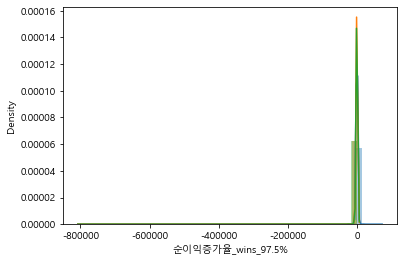

In [109]:
df_win = df.copy(deep=True)

#Winsorize on right-tail
df_win['순이익증가율_wins_95%'] = winsorize(df['순이익증가율'], limits=(0, 0.05))
df_win['순이익증가율_wins_97.5%'] = winsorize(df['순이익증가율'], limits=(0, 0.25))

df_win.describe()

#Distribution plot: Crime rate per capita by town
sns.distplot(df['순이익증가율'])

#New distribution plots 
sns.distplot(df_win['순이익증가율_wins_95%'])
sns.distplot(df_win['순이익증가율_wins_97.5%'])

In [129]:
df_imp = df.copy(deep=True)
probable_outliers_tm = [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 
                        403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 
                        437, 440, 468, 477]


def outliers_to_nan(df, variable_name, probable_outliers):
    for i in probable_outliers_tm:
        df.at[i, variable_name] = None
    return df

df_imp = outliers_to_nan(df_imp, '순이익증가율', probable_outliers_tm)                    
df_imp 

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,재고자산증가율,자기자본증가율,순이익증가율,...,자본집약도,노동소득분배율,설비투자효율,총자본투자효율,기계투자효율,부가가치율,종업원수증가율,R & D 투자효율,무형자산처리무형자산개발비(천원),경상개발비(천원)
0,(주)CMG제약,58820.0,11-Dec,3.53,1.98,-5.91,17.64,-1.43,-2.02,0.00,...,202260.73,0.00,35.86,0.13,0.88,0.20,4.65,0.13,0.0,23703.0
1,(주)CMG제약,58820.0,12-Dec,-7.75,109.15,-4.12,207.08,7.73,75.17,0.00,...,426179.37,0.02,2.89,0.00,0.06,0.02,-0.74,0.74,0.0,120052.0
2,(주)CMG제약,58820.0,13-Dec,0.70,-2.09,16.09,-18.89,56.29,55.10,0.00,...,411121.79,0.00,77.91,0.13,1.52,0.34,1.49,0.66,5993000.0,134454.0
3,(주)CMG제약,58820.0,14-Dec,3.60,3.86,74.30,-25.93,6.37,0.01,-46.64,...,354075.16,0.00,37.80,0.12,0.89,0.31,20.59,0.51,3511000.0,116533.0
4,(주)CMG제약,58820.0,15-Dec,-32.22,-2.64,-5.37,-7.17,11.04,-4.48,-2409.61,...,362389.88,0.00,24.21,0.08,0.52,0.16,-4.88,3.08,3464000.0,831910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import  BayesianRidge ,LinearRegression

imputer = IterativeImputer(estimator=LinearRegression(),
                           n_nearest_features=None,
                           imputation_order='ascending')
                           #, sample_posterior=True)
#Fit imputer and transform                          
imputer.fit(df_imp['자기자본증가율'])
df_imp_tf = imputer.transform(df_imp['자기자본증가율'])
df_imp = pd.DataFrame(df_imp_tf, columns = y)

#New mean lowers to 2.36 with random seed at 10
df_imp.describe()

#New distribution plot
sns.distplot(df_imp['순이익증가율'])

ValueError: Expected 2D array, got 1D array instead:
array=[-2.02 75.17 55.1  ...   nan   nan   nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 이상치 제거 또는 조정 후 다시 한번 봅시다

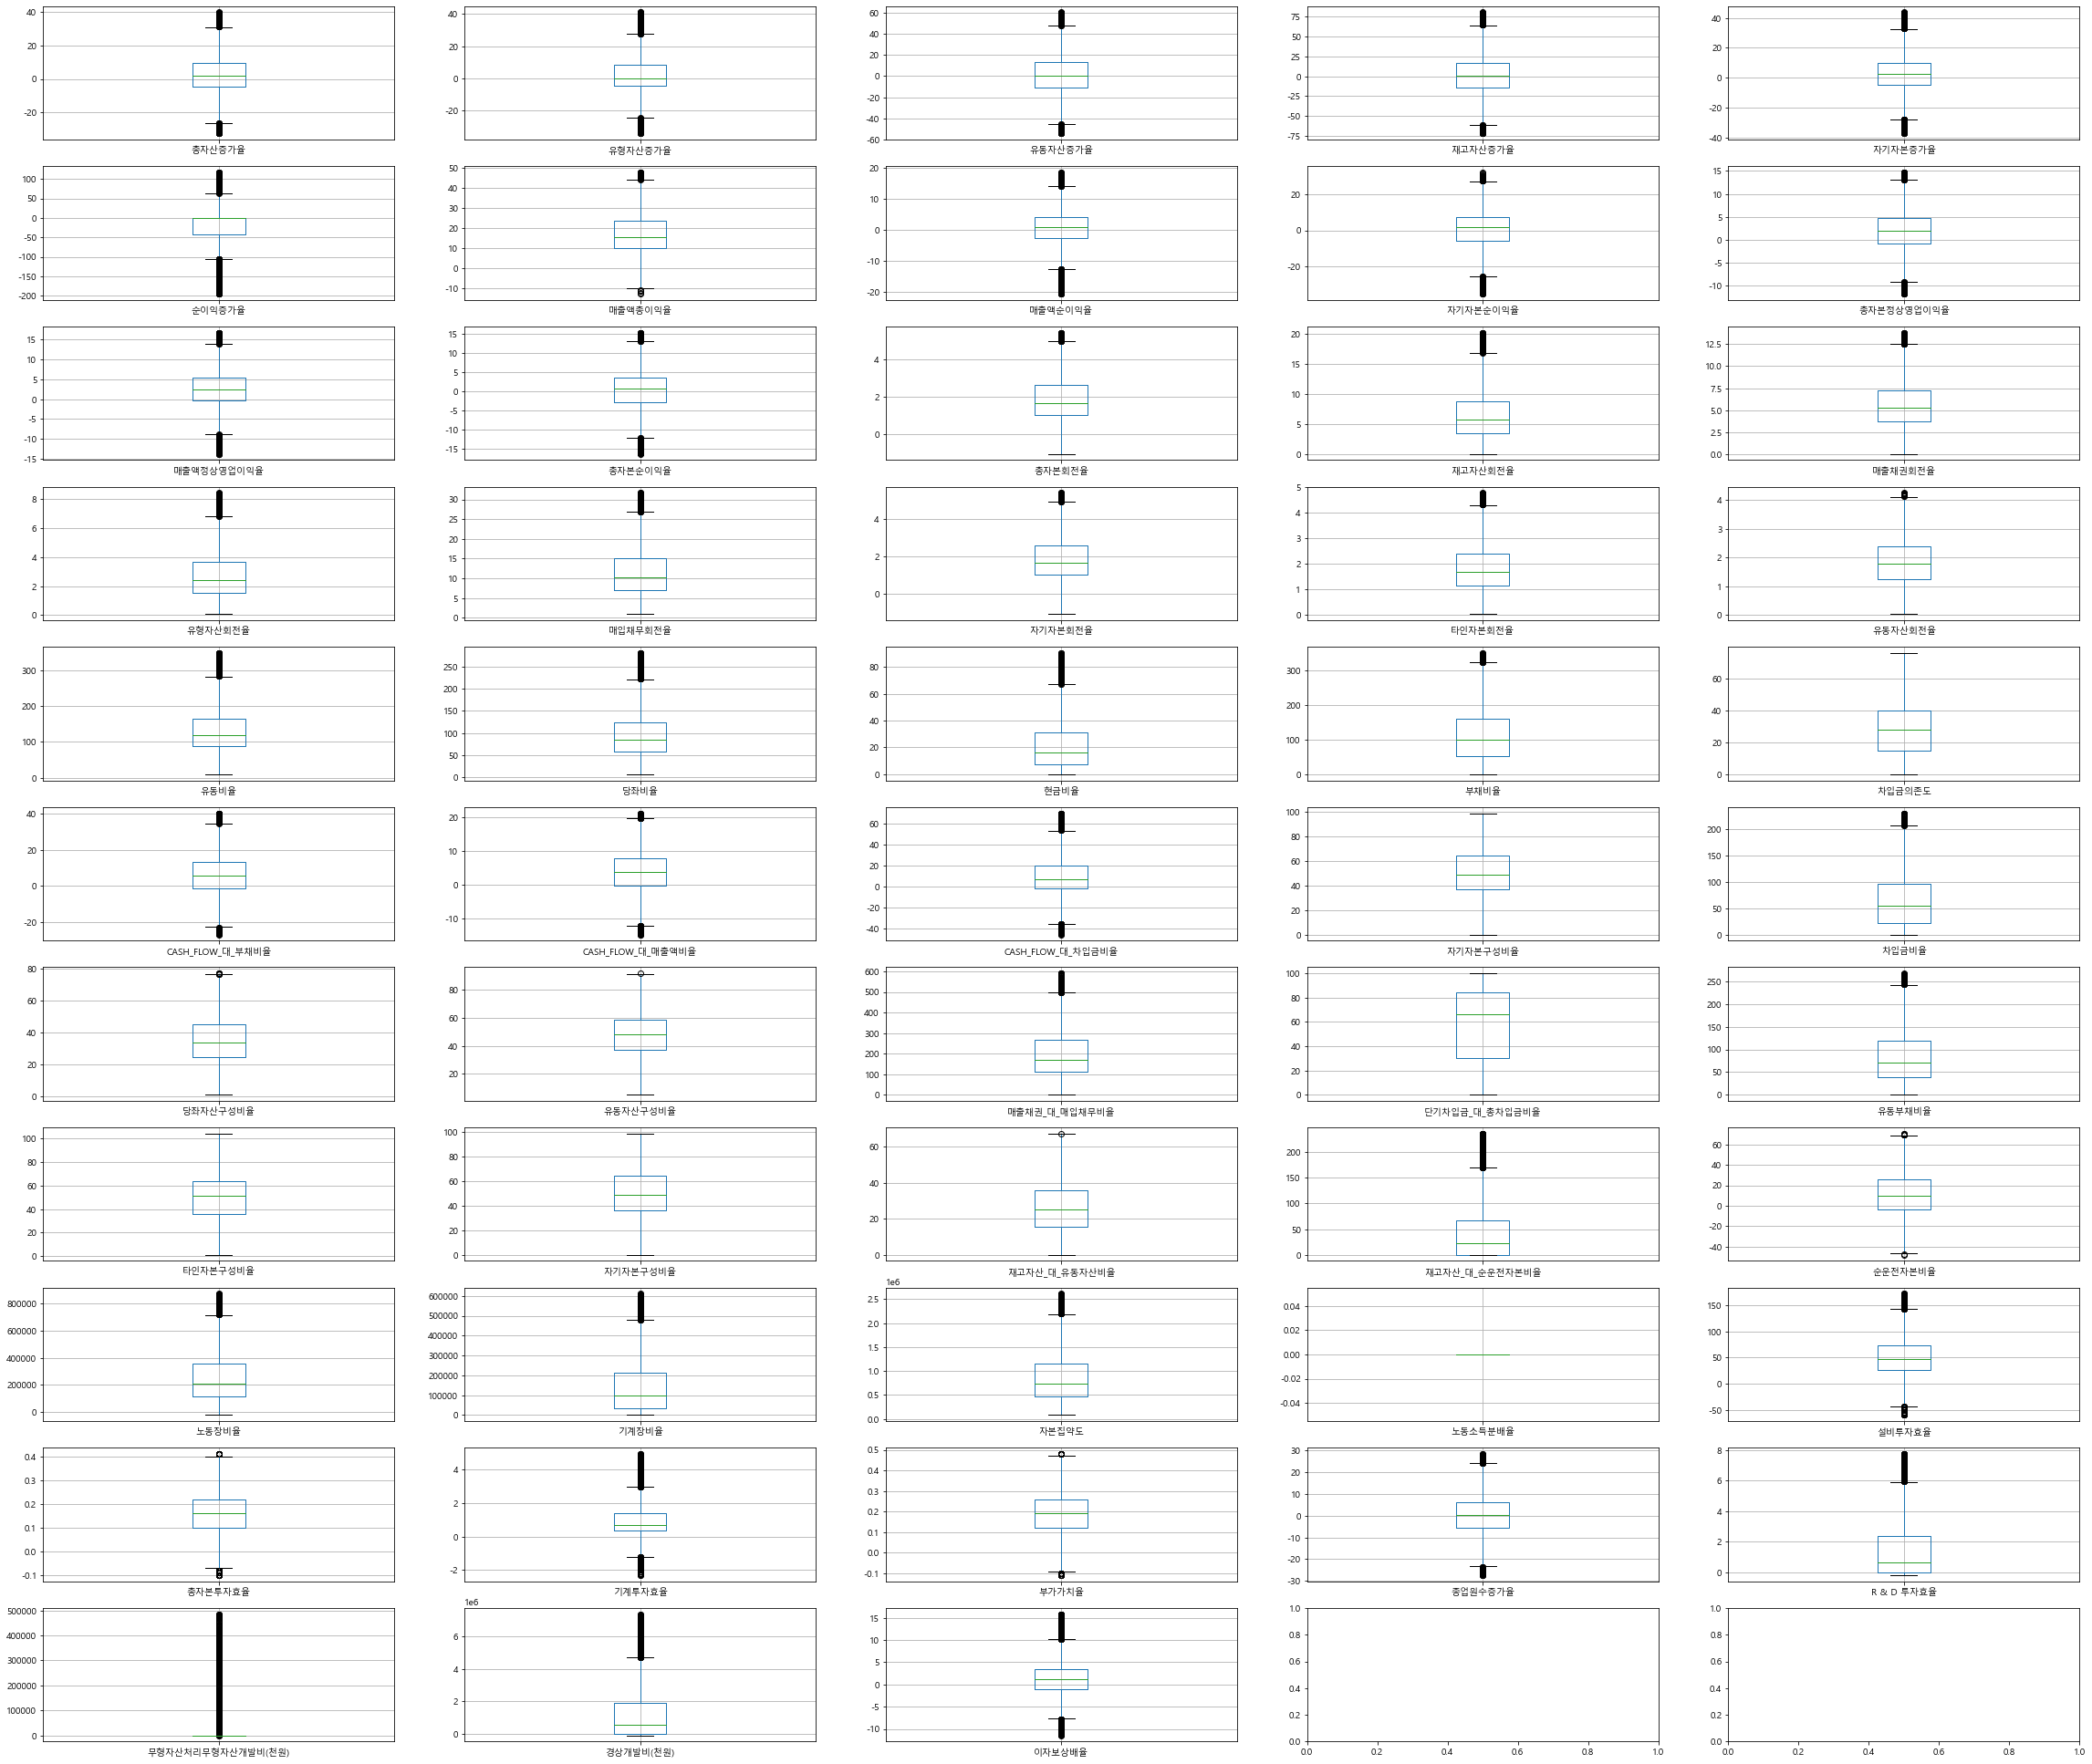

In [59]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(11, 5)
fig.set_size_inches((40,35))

df_iqr.boxplot(column='총자산증가율', ax=axes[0,0])
df_iqr.boxplot(column='유형자산증가율', ax=axes[0,1])
df_iqr.boxplot(column='유동자산증가율', ax=axes[0,2])
df_iqr.boxplot(column='재고자산증가율', ax=axes[0,3])
df_iqr.boxplot(column='자기자본증가율', ax=axes[0,4])
df_iqr.boxplot(column='순이익증가율', ax=axes[1,0])
df_iqr.boxplot(column='매출액총이익율', ax=axes[1,1])
df_iqr.boxplot(column='매출액순이익율', ax=axes[1,2])
df_iqr.boxplot(column='자기자본순이익율', ax=axes[1,3])
df_iqr.boxplot(column='총자본정상영업이익율', ax=axes[1,4])
df_iqr.boxplot(column='매출액정상영업이익율', ax=axes[2,0])
df_iqr.boxplot(column='총자본순이익율', ax=axes[2,1])
df_iqr.boxplot(column='총자본회전율', ax=axes[2,2])
df_iqr.boxplot(column='재고자산회전율', ax=axes[2,3])
df_iqr.boxplot(column='매출채권회전율', ax=axes[2,4])
df_iqr.boxplot(column='유형자산회전율', ax=axes[3,0])
df_iqr.boxplot(column='매입채무회전율', ax=axes[3,1])
df_iqr.boxplot(column='자기자본회전율', ax=axes[3,2])
df_iqr.boxplot(column='타인자본회전율', ax=axes[3,3])
df_iqr.boxplot(column='유동자산회전율', ax=axes[3,4])
df_iqr.boxplot(column='유동비율', ax=axes[4,0])
df_iqr.boxplot(column='당좌비율', ax=axes[4,1])
df_iqr.boxplot(column='현금비율', ax=axes[4,2])
df_iqr.boxplot(column='부채비율', ax=axes[4,3])
df_iqr.boxplot(column='차입금의존도', ax=axes[4,4])
df_iqr.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[5,0])
df_iqr.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[5,1])
df_iqr.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[5,2])
df_iqr.boxplot(column='자기자본구성비율', ax=axes[5,3])
df_iqr.boxplot(column='차입금비율', ax=axes[5,4])
df_iqr.boxplot(column='당좌자산구성비율', ax=axes[6,0])
df_iqr.boxplot(column='유동자산구성비율', ax=axes[6,1])
df_iqr.boxplot(column='매출채권_대_매입채무비율', ax=axes[6,2])
df_iqr.boxplot(column='단기차입금_대_총차입금비율', ax=axes[6,3])
df_iqr.boxplot(column='유동부채비율', ax=axes[6,4])
df_iqr.boxplot(column='타인자본구성비율', ax=axes[7,0])
df_iqr.boxplot(column='자기자본구성비율', ax=axes[7,1])
df_iqr.boxplot(column='재고자산_대_유동자산비율', ax=axes[7,2])
df_iqr.boxplot(column='재고자산_대_순운전자본비율', ax=axes[7,3])
df_iqr.boxplot(column='순운전자본비율', ax=axes[7,4])
df_iqr.boxplot(column='노동장비율', ax=axes[8,0])
df_iqr.boxplot(column='기계장비율', ax=axes[8,1])
df_iqr.boxplot(column='자본집약도', ax=axes[8,2])
df_iqr.boxplot(column='노동소득분배율', ax=axes[8,3])
df_iqr.boxplot(column='설비투자효율', ax=axes[8,4])
df_iqr.boxplot(column='총자본투자효율', ax=axes[9,0])
df_iqr.boxplot(column='기계투자효율', ax=axes[9,1])
df_iqr.boxplot(column='부가가치율', ax=axes[9,2])
df_iqr.boxplot(column='종업원수증가율', ax=axes[9,3])
df_iqr.boxplot(column='R & D 투자효율', ax=axes[9,4])
df_iqr.boxplot(column='무형자산처리무형자산개발비(천원)', ax=axes[10,0])
df_iqr.boxplot(column='경상개발비(천원)', ax=axes[10,1])
df_iqr.boxplot(column='이자보상배율', ax=axes[10,2])

plt.show()


### 상관분석

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True)

### features selection을 해봅시다

#### 일단 마땅한게 없어가지고 이보배로 합니다

In [36]:
# 마땅한 레이블이 없어 이걸로 일단 대체
df['이자보상배율'] = df['이자보상배율'].astype(int)

C:\Users\82104\AppData\Local\Temp\ipykernel_7332\3370800252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이자보상배율'] = df['이자보상배율'].astype(int)


In [121]:
x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본증가율', '순이익증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본정상영업이익율', '매출액정상영업이익율', '총자본순이익율', '총자본회전율', '재고자산회전율', '매출채권회전율',
       '유형자산회전율', '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '차입금비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '단기차입금_대_총차입금비율', '유동부채비율', '타인자본구성비율', '자기자본구성비율.1',
       '재고자산_대_유동자산비율', '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도',
       '노동소득분배율', '설비투자효율', '총자본투자효율', '기계투자효율', '부가가치율', '종업원수증가율',
       'R & D 투자효율', '무형자산처리무형자산개발비(천원)', '경상개발비(천원)']]

In [122]:
# x = df[['cashflow_부채비율','당좌비율','매입채무회전율','매출액총이익률',
#         '매출원가대매출액비율','매출채권회전율','부채비율',
#         '유동부채','유동비율','유동자산구성비율','유동자산증가율','유형자산증가율','유형자산회전율',
#         '자기자본구성비율','자본증가율','타인자본회전율','재고자산_유동자산비율','재고자산증가율','재고자산회전율',
#         '차입금의존도','총자본영업이익률','총자산순이익률','총자산증가율','총자산회전율','현금비율']]

In [123]:
y = df['이자보상배율']

In [125]:
x.shape

(4600, 52)

In [126]:
y.shape

(4600,)

### 정규화하기

In [31]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_std = SS.fit_transform(x,y)

### 로지스틱 회귀분석 함 돌려보자

In [32]:
# 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x,y)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(random_state=42, solver='liblinear')

In [33]:
print(log_reg.score(x,y))

0.1865217391304348


### 언놈이 영향을 많이 줬는지 확인하기

In [35]:
print(log_reg.coef_)

[[-6.44321297e-06 -4.75383453e-04 -1.59433340e-04 ...  2.21346452e-05
   9.29867987e-08 -4.39978668e-06]
 [ 4.91182370e-05 -6.79906367e-05  4.29933890e-05 ...  5.46347467e-05
  -2.17835100e-06  3.78544531e-08]
 [-3.24017781e-05 -1.68247714e-04 -2.66756415e-05 ... -7.18735436e-09
  -2.75043408e-04 -7.02123688e-04]
 ...
 [-9.91285694e-05 -1.91226092e-03  6.08153439e-04 ... -3.23037092e-06
  -4.04595649e-06 -8.41407743e-06]
 [-9.83571372e-05 -8.54585725e-04  4.85178824e-05 ... -4.30661567e-07
  -1.29958189e-05 -3.25655965e-05]
 [-5.49582127e-05  1.49421571e-04 -1.63818183e-05 ... -1.28231614e-06
  -1.33084101e-07  2.32553592e-09]]


### T-test도 해보아요~

In [37]:
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 이자보상배율   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     15.94
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          3.53e-123
Time:                        15:16:51   Log-Likelihood:                -71248.
No. Observations:                4600   AIC:                         1.426e+05
Df Residuals:                    4549   BIC:                         1.429e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.578e+04   1.37e+06      0.063      0.950   -2.59e+06    2.77e+06
총자산증가율                3.2718     35.445      0.092      0.926     -66.217      72.761
유형자산증가율               7.4018      9.083      0.815      0.415     -10.406      25.210
유동자산증가율             -33.7176     64.960     -0.519      0.604    -161.071      93.636
재고자산증가율               0.0226      0.166      0.136      0.892      -0.303       0.348
자기자본증가율               8.7975     23.109      0.381      0.703     -36.507      54.102
순이익증가율                3.6551      3.957      0.924      0.356      -4.102      11.412
매출액총이익율            4024.4606   1655.944      2.430      0.015     778.006    7270.915
매출액순이익율           -3980.2592   1501.123     -2.652      0.008   -6923.189   -1037.330
자기자본순이익율           -144.7027    584.877     -0.247      0.805   -1291.346    1001.940
총자본정상영업이익율        -1.623e+04   5724.784     -2.835      0.005   -2.75e+04   -5003.879
매출액정상영업이익율          934.9670   2084.323      0.449      0.654   -3151.319    5021.253
총자본순이익율            1.173e+04   4347.384      2.698      0.007    3207.313    2.03e+04
총자본회전율            -8732.7953   5505.944     -1.586      0.113   -1.95e+04    2061.529
재고자산회전율              -9.5580      8.973     -1.065      0.287     -27.150       8.034
매출채권회전율             -12.2764     42.678     -0.288      0.774     -95.945      71.392
유형자산회전율           -1650.7211   1762.431     -0.937      0.349   -5105.942    1804.500
매입채무회전율               0.5286     49.083      0.011      0.991     -95.698      96.756
자기자본회전율           -8732.7953   5505.944     -1.586      0.113   -1.95e+04    2061.529
타인자본회전율            2.138e+05   2.08e+04     10.276      0.000    1.73e+05    2.55e+05
유동자산회전율              -5.8768      9.581     -0.613      0.540     -24.661      12.907
유동비율               1786.0477    645.842      2.765      0.006     519.884    3052.211
당좌비율               -319.7190    679.088     -0.471      0.638   -1651.062    1011.624
현금비율              -2055.6641    337.741     -6.087      0.000   -2717.801   -1393.527
부채비율                 45.8385    245.214      0.187      0.852    -434.901     526.577
차입금의존도              653.9378   2476.859      0.264      0.792   -4201.908    5509.784
CASH_FLOW_대_부채비율   1448.1033    900.940      1.607      0.108    -318.176    3214.383
CASH_FLOW_대_매출액비율  2745.3864   1781.782      1.541      0.123    -747.772    6238.545
CASH_FLOW_대_차입금비율    -1.1501      0.535     -2.150      0.032      -2.199      -0.101
자기자본구성비율          -4371.0803   6851.055     -0.638      0.523   -1.78e+04    9060.314
차입금비율               -25.3829    298.805     -0.085      0.932    -611.185     560.420
당좌자산구성비율           2.375e+04   8570.825      2.772      0.006    6951.294    4.06e+04
유동자산구성비율          -1.063e+04   6971.244     -1.525      0.127   -2.43e+04

### 릿지를 합시다!

In [38]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-2.45882839e+12 -1.93439126e+12 -2.40750794e+13 -1.27596256e+12
 -6.38198727e+12]
 5 folds 의 개별 RMSE scores :  [1568065.174 1390823.951 4906636.259 1129585.125 2526259.541]
 5 folds 의 평균 RMSE : 2304274.010 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.24161e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.81954e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.54085e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.27928e-18): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 0 일 때 5 folds 의 평균 RMSE : 2294238.516 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2294230.567 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.11984e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.13339e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.48247e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.20759e-20): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 1 일 때 5 folds 의 평균 RMSE : 2295626.163 
alpha 10 일 때 5 folds 의 평균 RMSE : 2304274.010 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.89779e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.24161e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.81954e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.54085e-19): result may not be accurate.
  return linalg.solve(A, Xy, sy

alpha 100 일 때 5 folds 의 평균 RMSE : 2316583.897 


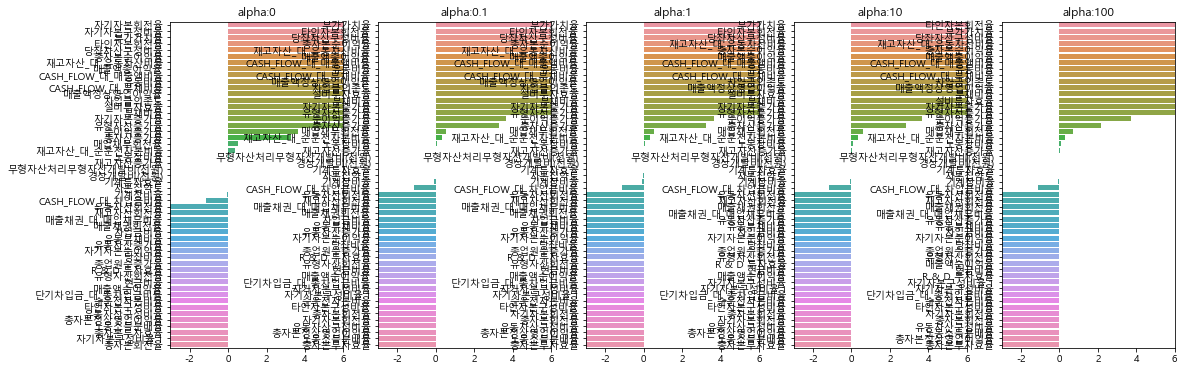

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
자기자본회전율,2.541052e+11,-8745.603304,-8855.971447,-9620.275709,-10840.915101
자기자본구성비율,1.701405e+11,-4365.967047,-4321.755329,-4005.042624,-3226.762049
부가가치율,3.491593e+05,347675.518490,334750.672141,243923.068534,64318.798489
타인자본회전율,2.138270e+05,213735.342404,212934.497818,207190.326650,192680.980454
당좌자산구성비율,2.375431e+04,23757.151471,23781.926404,23951.645444,24174.078711
총자본순이익율,1.172991e+04,11696.692191,11406.734615,9370.110600,5329.399118
재고자산_대_유동자산비율,1.040140e+04,10401.237777,10400.043392,10389.635209,10324.220309
매출액총이익율,4.024469e+03,4025.083363,4030.425646,4065.651525,4073.069522
CASH_FLOW_대_매출액비율,2.745367e+03,2745.077004,2742.403100,2723.175297,2669.617174
유동비율,1.786054e+03,1786.820211,1793.492296,1840.771445,1944.428915


In [39]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x, y)
   
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

     # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=x.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### 라쏘가 여윽시 최고겠죠?

In [40]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 3000, 6000, 9000, 12000, 15000]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 3000일 때 5 폴드 세트의 평균 RMSE: 2310110.861 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.860e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 6000일 때 5 폴드 세트의 평균 RMSE: 2313698.466 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.795e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.800e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 9000일 때 5 폴드 세트의 평균 RMSE: 2311426.055 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.728e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 12000일 때 5 폴드 세트의 평균 RMSE: 2307830.358 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.650e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 15000일 때 5 폴드 세트의 평균 RMSE: 2304748.440 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+15, tolerance: 8.989e+11
  model = cd_fast.enet_coordinate_descent(


,alpha:3000,alpha:6000,alpha:9000,alpha:12000,alpha:15000
타인자본회전율,190669.834430,184798.911252,180956.490723,177113.165240,173269.909015
당좌자산구성비율,23188.783398,21896.522967,20598.407905,19300.165328,18001.926139
재고자산_대_유동자산비율,9812.494592,9265.928135,8684.952231,8103.690460,7522.423760
총자본순이익율,4724.207311,3639.723911,3299.801428,2958.492171,2617.155886
매출액총이익율,4154.091659,3949.567596,3840.862198,3732.068485,3623.269672
CASH_FLOW_대_매출액비율,2542.607042,2598.171537,2558.929033,2519.720000,2480.513939
유동비율,1930.486034,1924.525970,1912.111735,1899.777087,1887.443292
CASH_FLOW_대_부채비율,1461.349605,1471.039804,1512.894822,1554.739056,1596.581048
차입금의존도,1285.184030,1248.351852,1109.358861,971.829126,834.443835
매출액정상영업이익율,721.052000,454.362006,335.126097,215.795501,96.460964


### 라쏘 릿지 했는데 엘라스틱 안하면 섭섭합니다!

In [41]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=x, y_target_n=y)

# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 2316044.790 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.954e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.967e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2317248.115 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.961e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.977e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 2318798.711 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.967e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 1일 때 5 폴드 세트의 평균 RMSE: 2317644.364 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.982e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.008e+15, tolerance: 6.928e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

alpha 3일 때 5 폴드 세트의 평균 RMSE: 2314502.144 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.154e+15, tolerance: 7.406e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.874e+15, tolerance: 8.989e+11
  model = cd_fast.enet_coordinate_descent(


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
타인자본회전율,192917.539000,190098.533418,166814.139116,146104.276328,98048.136498
부가가치율,66233.814739,48514.077008,8622.227509,3149.203225,77.546244
당좌자산구성비율,24180.271499,24154.400224,23437.752518,22524.066184,19578.795838
재고자산_대_유동자산비율,10330.042050,10305.017293,9990.421081,9619.985396,8397.182928
자기자본구성비율,6309.384642,6111.511073,3429.296736,1585.643030,810.749497
총자본순이익율,5380.890504,4967.477508,3806.148184,3395.326337,2568.901478
매출액총이익율,4075.608610,4048.747477,3646.321882,3232.830293,2229.264159
CASH_FLOW_대_매출액비율,2670.312027,2658.396826,2555.534793,2463.339567,2246.597360
유동비율,1942.725830,1957.541287,2045.528935,2111.359369,2245.317010
CASH_FLOW_대_부채비율,1443.704438,1458.003790,1650.545495,1842.387949,2293.608851


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=x)
    print(X_data_scaled.shape, x.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y, verbose=False, return_coeff=False)

(4600, 52) (4600, 52)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2294230.567 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2295626.163 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2304274.010 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2316583.897 
(4600, 52) (4600, 52)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 2267952.201 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2079001.260 


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.13339e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.48247e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.20759e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.4214e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym

alpha 10일 때 5 폴드 세트의 평균 RMSE: 1528547.491 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1327587.047 
(4600, 1430) (4600, 52)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 257608440.720 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 79244035.476 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 10316374.134 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 3792292.612 
(4600, 52) (4600, 52)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1321421.814 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1309085.334 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1314795.703 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1334870.616 
(4600, 1430) (4600, 52)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1373332.118 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1291119.583 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1279617.570 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1297491.389 
(4600, 52) (4600, 52)

## 변환 유형:Log, Polynomial Degree:None


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py", line 1122, in fit
    X, y = self._validate_data(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
